### Train network on the MNIST dataset

To download the dataset, run the following cell:

In [ ]:
#from dataset_mnist import download
#download(directory='data')

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import train_mnist

params = {
    # Dataset
    'root_dir': Path('data'), 
    'train_val_split': 0.1,      
    # Model
    'channels': 8, 
    'fc_channels': 8,
    # Training
    'epochs': 5,
    'lr': 0.01,
    'batch_size_train': 64,
    'batch_size_valid': 64, 
    'momentum': 0.9,
    'weight_decay': 0.,
    'seed': 12,
    'loss': 'cross_entropy',
    'scheduler_power': 0.9,
    # Logging
    'log_dir': 'logs',
    'experiment':'channels_32',
    'save_every':1,                
    'save_best':True,
}
# channels: 8, fc_channels: 8 - 99% accuracy
# channels: 64, fc_channels: 4 - 99% accuracy
logger, ds_train, ds_valid, model = train_mnist.run(params)


Epoch 1/5
Batch 844/844, Train loss: 0.8955610394477844
Epoch finished in 6.0 seconds
Train loss: 1.348436616456067, Valid loss: 0.4230698347091675, Acc: 0.9254999756813049
Epoch 2/5
Batch 844/844, Train loss: 1.1620093584060676
Epoch finished in 5.9 seconds
Train loss: 1.0165911122428046, Valid loss: 0.2523689568042755, Acc: 0.9663333296775818
Epoch 3/5
Batch 844/844, Train loss: 0.9589867591857915
Epoch finished in 5.7 seconds
Train loss: 0.9681264105902778, Valid loss: 0.2294854074716568, Acc: 0.971666693687439
Epoch 4/5
Batch 844/844, Train loss: 0.8076646924018864
Epoch finished in 5.6 seconds
Train loss: 0.951646036695551, Valid loss: 0.21616432070732117, Acc: 0.9775000214576721
Epoch 5/5
Batch 844/844, Train loss: 0.9936564564704895
Epoch finished in 5.5 seconds
Train loss: 0.9313086320912396, Valid loss: 0.2095162719488144, Acc: 0.9808333516120911


### Random additional tests. Ignore

In [9]:
torch.save(model.state_dict(), 'mnist_model.pth')

In [10]:
model.eval()
model.cpu()

idx = 0
img, label = ds_train[idx]

hook, storage = create_hook()
handler = model.relu4.register_forward_hook(hook)
y = model(img[None])[0]
A = storage['act']
y_c = y[label]
y_c.backward(inputs=A)
dydA = A.grad[0].clone()
print(dydA[0])
A = A[0].detach()
alpha = dydA.mean(dim=(1, 2), keepdim=True)
L = F.relu((alpha*A).sum(dim=0))
atribution = F.interpolate(L.reshape(1,1,*L.shape), size=img.shape[-2:], mode='bilinear')
atribution = atribution.squeeze()
probs = F.softmax(y.detach(), dim=0)

handler.remove()

tensor([[-2.1304e-03,  3.2036e-03, -7.9993e-05,  2.4503e-03,  8.9178e-04,
         -1.2250e-03,  7.2557e-04],
        [-6.1877e-03, -7.1357e-03, -2.9909e-03, -1.1781e-03,  2.7180e-03,
          4.1541e-03,  6.2785e-04],
        [-1.0656e-03, -2.4108e-03,  1.3808e-02,  1.3609e-02,  1.8735e-03,
         -8.6392e-03, -1.1095e-03],
        [ 2.7282e-05,  3.9098e-03,  4.1380e-03, -4.2706e-03, -7.8118e-03,
         -4.1534e-04,  3.6910e-03],
        [ 2.0407e-03,  2.0559e-03, -7.0558e-03, -5.0255e-03, -5.0900e-03,
         -4.6869e-04,  3.3058e-03],
        [ 4.1977e-03,  3.3828e-04, -1.6364e-03, -4.0800e-04, -1.1398e-03,
         -5.0259e-03, -2.7827e-03],
        [ 1.9876e-03,  2.9065e-03,  1.7439e-03, -2.8781e-04,  1.1199e-03,
         -6.8808e-03, -5.0870e-03]])


In [22]:
alpha[:,0,0]

tensor([-4.2981e-03, -1.3095e-02, -1.8266e-03, -1.0991e-02,  1.1897e-03,
        -1.0637e-02,  2.3248e-03, -1.6905e-02,  1.1775e-02,  1.6826e-02,
        -1.5473e-02,  4.6953e-03, -1.0277e-02, -1.4819e-03, -7.1583e-03,
         1.6134e-02,  1.1144e-02, -2.8409e-03,  1.9118e-02, -8.3570e-03,
         2.0908e-02,  2.7497e-02, -7.9206e-03,  1.5538e-02, -1.4125e-02,
        -1.5408e-02, -4.8971e-03, -4.8041e-03,  2.9939e-03,  2.5081e-04,
         1.3710e-03, -1.6540e-02, -6.6430e-03, -6.1938e-03, -6.0459e-03,
        -3.0556e-05,  2.0010e-02,  2.3873e-02,  1.1193e-02,  2.7117e-02,
         1.1282e-02, -6.8914e-03, -1.2668e-02,  2.5330e-02,  6.0465e-03,
         1.7580e-02, -1.2519e-02,  1.1035e-02, -1.2290e-02,  2.0746e-02,
        -1.3624e-02, -9.3484e-03, -3.2971e-03, -9.3719e-03, -1.2329e-02,
         4.2123e-03, -5.7250e-03, -1.9703e-03, -2.1088e-04,  1.3735e-02,
        -9.5756e-03, -1.6956e-02,  1.6430e-02, -9.9461e-03])

In [47]:
acts = []
def hook(module, args, output):
    acts.append(output.detach().cpu())
handler = model.fc1.register_forward_hook(hook)

model.eval()
labels = []
with torch.no_grad():
    for x, y in ds_train:
        _ = model(x[None].cuda())
        labels.append(y)

acts_t = torch.zeros(len(acts), 4)
for idx, act in enumerate(acts):
    acts_t[idx] = act
labels_t = torch.tensor(labels)

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=False)
act_pca = pca.fit_transform(acts_t)

In [49]:
acts_t.shape

torch.Size([54000, 4])

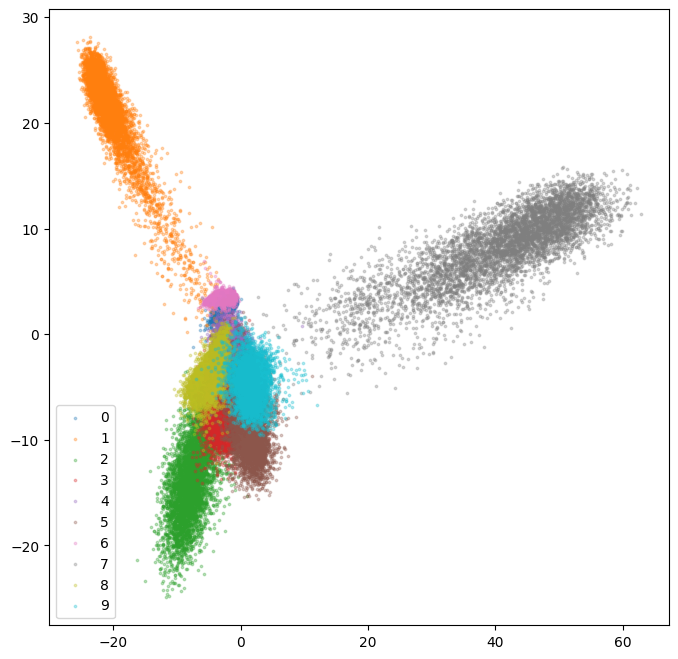

In [50]:
plt.figure(figsize=[8,8])
for i in range(0, 10):
    acts_c = act_pca[labels_t==i]
    plt.scatter(acts_c[:,0], acts_c[:,1], s=3, alpha=0.3, label=str(i))
plt.legend()

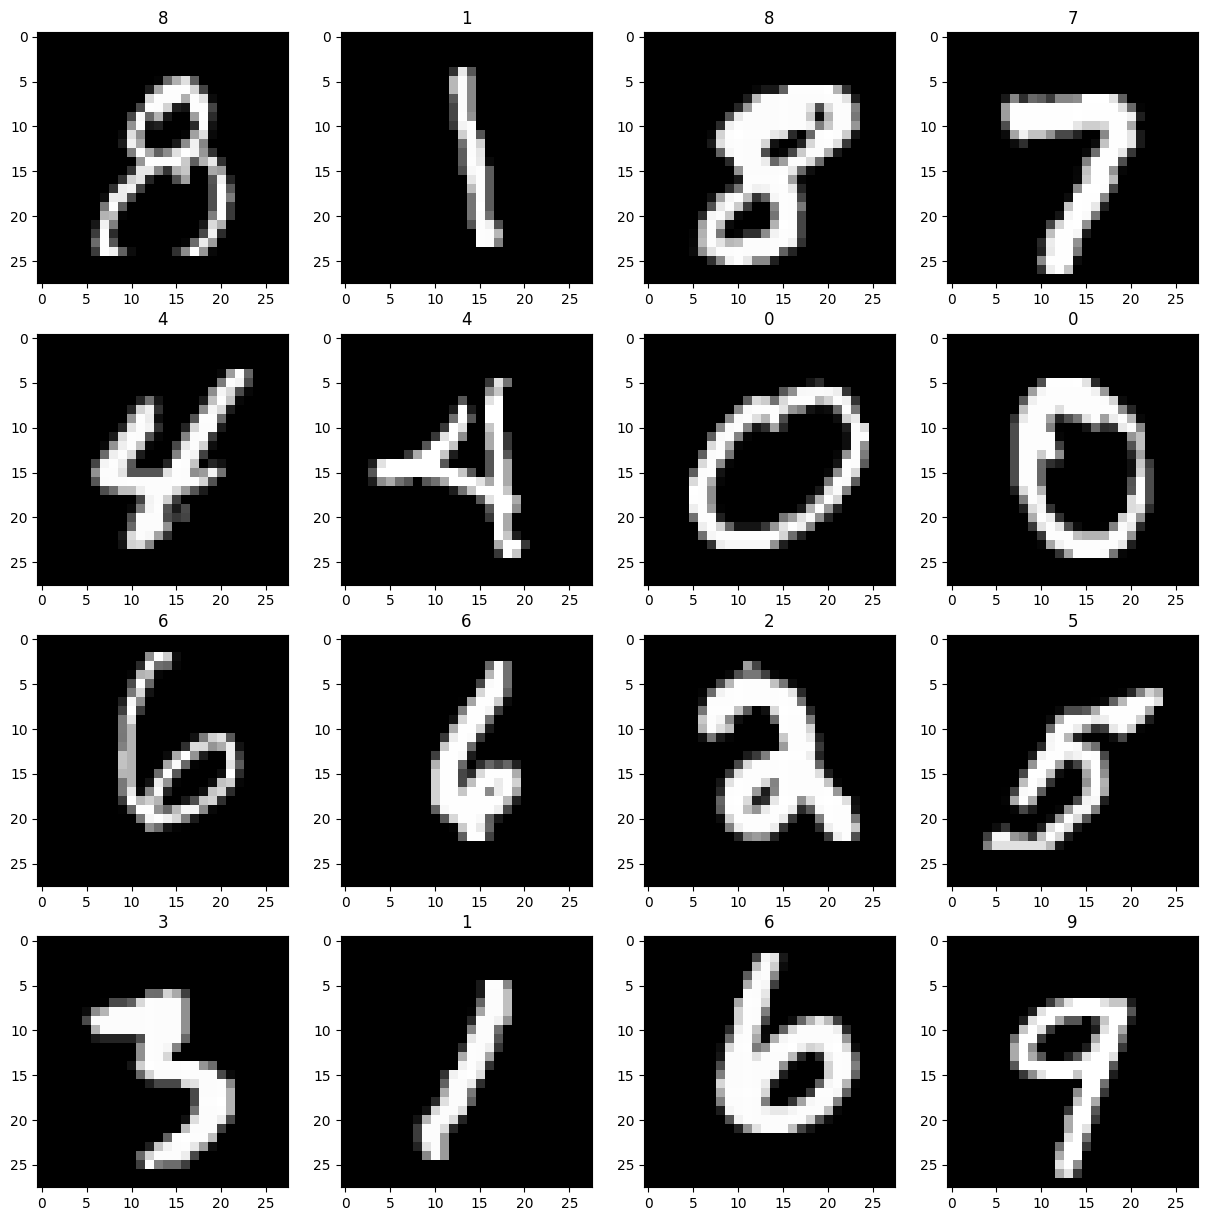

In [18]:
def view_images(ds):

    plt.figure(figsize=[15, 15])
    for i in range(16):
        img, label = ds[i]
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img, 'gray')
        plt.title(label)

view_images(ds_train)